In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import datetime

plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('PRODUCTSALES1.csv')

In [3]:
df.head()

,sale_date,sale_time,transpos,clerkname,main_id,plu,dissno,qty,descr,last_price,...,pdiscount,gst,sellprice,grosssales,tdiscount,rounding,salesamm2,tendered,change,ref
0,01-Jan-20,09:35:38,1.001040e+15,Monina,704438508410,16535,4,1.0,GVC PB Peru Balsam,3.45,...,1.00,0.00,18.95,250.41,12.53,0.0,259.11,259.11,0.0,NaN
1,01-Jan-20,09:35:38,1.001040e+15,Monina,9329785000588,4689,1,1.0,Nv Zinc Comp 60t,5.09,...,0.52,0.98,10.78,250.41,12.53,0.0,259.11,259.11,0.0,NaN
2,01-Jan-20,09:35:38,1.001040e+15,Monina,9332510002016,1024,1,1.0,Tres B Plus 150t,49.17,...,4.03,7.66,84.22,250.41,12.53,0.0,259.11,259.11,0.0,NaN
3,01-Jan-20,09:35:38,1.001040e+15,Monina,9317320405004,17550,7,1.0,MD Goats Yog (B) 500,4.50,...,0.36,0.00,6.74,250.41,12.53,0.0,259.11,259.11,0.0,NaN
4,01-Jan-20,09:35:39,1.001040e+15,Monina,797776496792,16640,5,1.0,Aroma Bloom Wood Pea,52.25,...,4.53,8.61,94.72,250.41,12.53,0.0,259.11,259.11,0.0,NaN


In [4]:
df.shape

(65534, 21)

In [5]:
df.isnull().sum()

sale_date         0
sale_time         0
transpos          0
clerkname         0
main_id           0
plu               0
dissno            0
qty               0
descr             0
last_price        0
cost              0
pdiscount         0
gst               0
sellprice         0
grosssales        0
tdiscount         0
rounding          0
salesamm2         0
tendered          0
change            0
ref           65532
dtype: int64

In [6]:
df = df.drop(labels = ['ref', 'transpos', 'main_id', 'plu', 'dissno', 'tdiscount', 'rounding', 'salesamm2', 'tendered', 'change'], axis=1)

In [7]:
df.head()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales
0,01-Jan-20,09:35:38,Monina,1.0,GVC PB Peru Balsam,3.45,19.95,1.00,0.00,18.95,250.41
1,01-Jan-20,09:35:38,Monina,1.0,Nv Zinc Comp 60t,5.09,10.32,0.52,0.98,10.78,250.41
2,01-Jan-20,09:35:38,Monina,1.0,Tres B Plus 150t,49.17,80.59,4.03,7.66,84.22,250.41
3,01-Jan-20,09:35:38,Monina,1.0,MD Goats Yog (B) 500,4.50,7.10,0.36,0.00,6.74,250.41
4,01-Jan-20,09:35:39,Monina,1.0,Aroma Bloom Wood Pea,52.25,90.64,4.53,8.61,94.72,250.41


In [8]:
print(set(df['descr'].unique()))

{'BP UMF5+ MHoney250g', 'Boody Crop Leg Bla L', 'NG Msl Prm Tst 750g', 'DG Eye Shadow Summer', 'PF Nut Roast 300g', 'PNO Mars Root 75g', 'GVC Empty Bottle 10m', 'Coyo Yog Van 300', 'THO HePwdr Choc 450g', 'Bc UC EPA/DHA+ 240c', 'NR Plnt Prot Ch 1kg', 'NFChips Peri Peri', 'End Van 1440g', 'B Cond Coconut 16oz', 'Del Tealight Mademoi', 'Tilley Bath BombLemo', 'PB Eucalyptus 50ml', 'GVC Peaz Bites 110g', '2die4 Pecans 300g', 'Wel Alm Face Cr 30ml', 'Pow Cacao Gold 450g', 'Eco Tan Hand Sanitiz', 'LU NDM 100g', 'Max Health WPI 4kg', 'DFDU Vegan Cheddar s', 'UVN Sport 30+ 125g', 'Bm Cold Combat', 'J&B Melatonin 3mg100', 'TON PeBlond 6R 120ml', 'Agna IS Smudge Stick', 'Incense Gardenia', 'Castile Orig Pump 50', 'PO Caraway Seed', 'Lot Sunflw Kern 250g', 'Sp Plum Vinegar 250m', 'NR Alm Chia Spr 240g', 'PP Almond Oil 250ml', 'TE Chaga Mushr 50g', 'N-Zimes 90t', 'PB Clove Bud 10 ml', 'Spiral Olv Oil X/V 5', 'TP Acne ctrl kit', 'BB Kakadu LuxSCan185', 'MER MCPro Plus 500ml', 'Eco Tan Nat Sunscree

In [9]:
df['descr'] = df.descr.str.lower()

In [10]:
df['descr']

0          gvc pb peru balsam
1            nv zinc comp 60t
2            tres b plus 150t
3        md goats yog (b) 500
4        aroma bloom wood pea
                 ...         
65529      2die4 walnuts 300g
65530       peanut butter 1kg
65531    lot yeast shake 145g
65532       o ap+ci pcake mix
65533    on 100% whey ext cho
Name: descr, Length: 65534, dtype: object

In [11]:
df.dtypes

sale_date      object
sale_time      object
clerkname      object
qty           float64
descr          object
last_price    float64
cost          float64
pdiscount     float64
gst           float64
sellprice     float64
grosssales    float64
dtype: object

In [12]:
df.sale_date = pd.to_datetime(df['sale_date'], format=None)

In [13]:
df.head()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales
0,2020-01-01,09:35:38,Monina,1.0,gvc pb peru balsam,3.45,19.95,1.00,0.00,18.95,250.41
1,2020-01-01,09:35:38,Monina,1.0,nv zinc comp 60t,5.09,10.32,0.52,0.98,10.78,250.41
2,2020-01-01,09:35:38,Monina,1.0,tres b plus 150t,49.17,80.59,4.03,7.66,84.22,250.41
3,2020-01-01,09:35:38,Monina,1.0,md goats yog (b) 500,4.50,7.10,0.36,0.00,6.74,250.41
4,2020-01-01,09:35:39,Monina,1.0,aroma bloom wood pea,52.25,90.64,4.53,8.61,94.72,250.41


In [14]:
df['brand'] = df.descr.str.split(' ',1)
    

In [15]:
df['brand']

0          [gvc, pb peru balsam]
1            [nv, zinc comp 60t]
2            [tres, b plus 150t]
3        [md, goats yog (b) 500]
4        [aroma, bloom wood pea]
                  ...           
65529      [2die4, walnuts 300g]
65530       [peanut, butter 1kg]
65531    [lot, yeast shake 145g]
65532       [o, ap+ci pcake mix]
65533    [on, 100% whey ext cho]
Name: brand, Length: 65534, dtype: object

In [16]:
df.head()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales,brand
0,2020-01-01,09:35:38,Monina,1.0,gvc pb peru balsam,3.45,19.95,1.00,0.00,18.95,250.41,"[gvc, pb peru balsam]"
1,2020-01-01,09:35:38,Monina,1.0,nv zinc comp 60t,5.09,10.32,0.52,0.98,10.78,250.41,"[nv, zinc comp 60t]"
2,2020-01-01,09:35:38,Monina,1.0,tres b plus 150t,49.17,80.59,4.03,7.66,84.22,250.41,"[tres, b plus 150t]"
3,2020-01-01,09:35:38,Monina,1.0,md goats yog (b) 500,4.50,7.10,0.36,0.00,6.74,250.41,"[md, goats yog (b) 500]"
4,2020-01-01,09:35:39,Monina,1.0,aroma bloom wood pea,52.25,90.64,4.53,8.61,94.72,250.41,"[aroma, bloom wood pea]"


In [17]:
df['brand'].value_counts()

[peanut, butter 1kg]       924
[pep, collagen hy 500g]    671
[bc, um night 240g]        423
[sweet, nectar cake]       396
[nt, org bwheat bread]     297
                          ... 
[sc, nail groove is in]      1
[eagle, sb forte 60c]        1
[che, ai bmb 600ml]          1
[ch, fibretone 200g]         1
[lkw, c jo 946ml]            1
Name: brand, Length: 4037, dtype: int64

In [18]:
df['brand2'] = df.descr.str.partition(' ')[0]
df['brand2']

0           gvc
1            nv
2          tres
3            md
4         aroma
          ...  
65529     2die4
65530    peanut
65531       lot
65532         o
65533        on
Name: brand2, Length: 65534, dtype: object

In [19]:
df['brand2'].value_counts()

bc         2663
ng         2316
nv         2077
fus        1670
smart      1557
           ... 
jungle        1
biobeet       1
chill         1
lunch         1
aromaco       1
Name: brand2, Length: 667, dtype: int64

In [20]:
print(set(df['brand2'].unique()))

{'lz', 'quepasa', 'rosa', 'flat', 'ps', 'htg', 'ateronon', 'mg', 'flo', 'saba', 'pukka', 'nt', 'paper', 'aromaco', 'gomacro', 'tgcc', 'ftn', 'agna', 'hs', 'idlewilde', 'herbal', 'uv', 'icelandic', 'tulsi', 'ls', 'arg', 'he', 'sweetlife', 'nes', 'ell', 'naturis', 'pr', 'coyo', 'tilley', 'keto', 'mojo', 'activated', 'uvn', 'kh', 'alo', 'mdr', 'en', 'glufreedom', 'hemp', 'ce', 'hsf', 'ogn', 'chlorella', 'opt', 'lauria', 'kitz', 'anthogenol', 'body', 'greek', 'tsb', 'h&b', 'pp', 'now', 'alkalife', 'nr', 'pimp', 'ez', 'golden', 'we', 'amphore', 'cholesterol', 'twf', '3', 'boo', 'jc', 'bon', 'o', 'so', 'melrose', 'cobs', 'te', 'nir', 'anas', 'ob', 'pompom', 'love', 'immunol', 'nl', 'til', 'core', 'fe', 'wg', 'holle', 'cheeki', 'h2g', 'castile', 'gr', 'deliver', 'lf', 'alk', 'rap', 'arborvitae', 'enc', 'bbik', 'tbg', 'cracked', 'nac', 'gev', 'tur', 'sl', 'mmcv', 'lc', 'ki', 'mp', '2die4', 'endura', 'j&b', 'glace', 'peanuts', 'pre', 'tog', 'bioceuticals', 'bergamet', 'pure', 'shiritaki', 'prt'

In [21]:
df.tail()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales,brand,brand2
65529,2020-12-27,11:18:17,Milla,1.00,2die4 walnuts 300g,13.46,23.70,0.0,0.0,23.70,74.20,"[2die4, walnuts 300g]",2die4
65530,2020-12-27,12:24:41,Milla,0.45,peanut butter 1kg,5.70,12.80,0.0,0.0,5.76,5.76,"[peanut, butter 1kg]",peanut
65531,2020-12-27,12:56:55,Paul,1.00,lot yeast shake 145g,6.77,10.15,0.0,0.0,10.15,14.10,"[lot, yeast shake 145g]",lot
65532,2020-12-27,12:56:55,Paul,1.00,o ap+ci pcake mix,2.32,3.95,0.0,0.0,3.95,14.10,"[o, ap+ci pcake mix]",o
65533,2020-12-27,12:58:51,Paul,1.00,on 100% whey ext cho,25.25,53.00,0.0,5.3,58.30,53.00,"[on, 100% whey ext cho]",on


In [22]:
df = df.drop(labels = ['brand'], axis=1)

In [23]:
df.tail()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales,brand2
65529,2020-12-27,11:18:17,Milla,1.00,2die4 walnuts 300g,13.46,23.70,0.0,0.0,23.70,74.20,2die4
65530,2020-12-27,12:24:41,Milla,0.45,peanut butter 1kg,5.70,12.80,0.0,0.0,5.76,5.76,peanut
65531,2020-12-27,12:56:55,Paul,1.00,lot yeast shake 145g,6.77,10.15,0.0,0.0,10.15,14.10,lot
65532,2020-12-27,12:56:55,Paul,1.00,o ap+ci pcake mix,2.32,3.95,0.0,0.0,3.95,14.10,o
65533,2020-12-27,12:58:51,Paul,1.00,on 100% whey ext cho,25.25,53.00,0.0,5.3,58.30,53.00,on


In [24]:
df['brand2'].value_counts()

bc         2663
ng         2316
nv         2077
fus        1670
smart      1557
           ... 
jungle        1
biobeet       1
chill         1
lunch         1
aromaco       1
Name: brand2, Length: 667, dtype: int64

In [25]:
bc = df.loc[df['brand2']=="bc"]
bc = bc.drop(labels=['brand2'], axis=1)
bc

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales
8,2020-01-01,10:18:34,Paul,1.0,bc ultbio 60 60c,56.95,96.45,0.00,9.65,106.10,96.45
60,2020-01-01,13:42:43,Paul,1.0,bc uc epa/dha+ 120c,28.80,48.77,2.44,4.63,50.97,48.77
78,2020-01-01,17:11:21,Monina,1.0,bc ultbio 60 60c,56.95,96.45,0.00,9.65,106.10,232.30
111,2020-01-02,10:37:20,Paul,1.0,bc mgest enz 180c,34.00,57.59,0.00,5.76,63.35,120.55
130,2020-01-02,11:19:29,Paul,1.0,bc zinc drops 50 ml,11.82,20.05,0.00,2.00,22.05,40.59
...,...,...,...,...,...,...,...,...,...,...,...
65380,2020-12-24,13:05:17,Diane,1.0,bc uc krill 60c,37.57,61.64,0.00,6.16,67.80,61.64
65381,2020-12-24,13:07:10,Diane,1.0,bc hickory barbecue,4.30,6.32,0.00,0.63,6.95,12.64
65382,2020-12-24,13:07:10,Diane,1.0,bc vinegar & seasalt,4.30,6.32,0.00,0.63,6.95,12.64
65404,2020-12-24,14:19:24,Diane,1.0,bc glfac forte 120c,35.52,58.32,2.92,5.54,60.94,108.54


In [26]:
bc['descr'].value_counts()

bc um night 240g        423
bc armaforce 60t        133
bc ultbio 60 60c         71
bc iron sus 30t          71
bc armaforce 120t        61
                       ... 
bc prodophlus 120 ca      1
bc pea liq 50ml           1
bc inflamzyme 90c         1
bc eczema rel 60g         1
bc avo salt pep           1
Name: descr, Length: 107, dtype: int64

In [27]:
print(bc[bc['pdiscount']>15])

       sale_date sale_time clerkname  qty              descr  last_price  \
1513  2020-01-09  14:16:27     Kelly  6.0  bc ume cream 400g       21.61   
32779 2020-06-23  14:43:03    Monina  6.0  bc ume cream 400g       21.61   
53558 2020-10-18  09:16:44     Milla  8.0   bc um night 240g       23.28   

        cost  pdiscount    gst  sellprice  grosssales  
1513   36.59      21.95  19.76     217.36      219.55  
32779  36.59      17.56  20.20     222.18      219.55  
53558  43.09      17.24  32.75     360.24      417.77  


In [28]:
bc.tail()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales
65380,2020-12-24,13:05:17,Diane,1.0,bc uc krill 60c,37.57,61.64,0.00,6.16,67.80,61.64
65381,2020-12-24,13:07:10,Diane,1.0,bc hickory barbecue,4.30,6.32,0.00,0.63,6.95,12.64
65382,2020-12-24,13:07:10,Diane,1.0,bc vinegar & seasalt,4.30,6.32,0.00,0.63,6.95,12.64
65404,2020-12-24,14:19:24,Diane,1.0,bc glfac forte 120c,35.52,58.32,2.92,5.54,60.94,108.54
65469,2020-12-24,16:39:35,Diane,1.0,bc avooil cl seasalt,5.03,7.23,0.00,0.72,7.95,47.09


<AxesSubplot:xlabel='sale_date'>

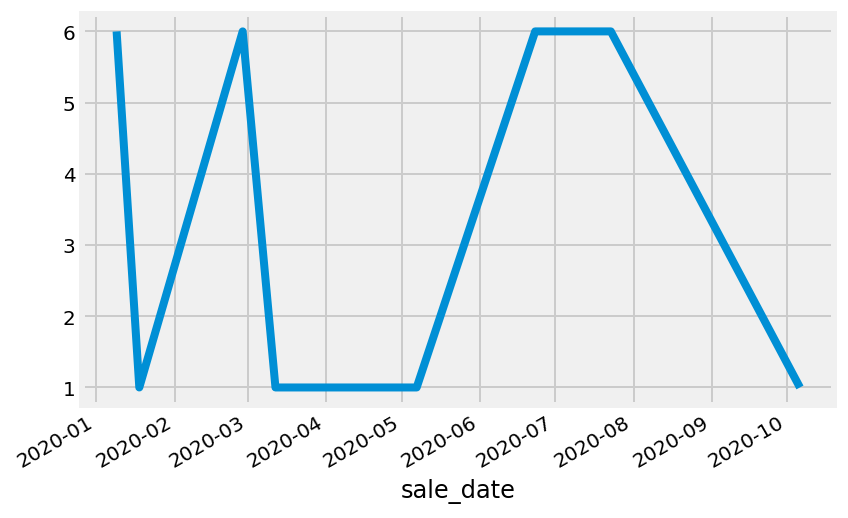

In [29]:
bc2 = bc.loc[(bc.descr == 'bc ume cream 400g')][['sale_date', 'qty']].copy()
bc2 = bc2.loc[(bc2.sale_date >= '2020-01-01') & (bc2.sale_date <= '2020-12-24')]
bc2.set_index('sale_date').qty.plot()

<AxesSubplot:xlabel='sale_date'>

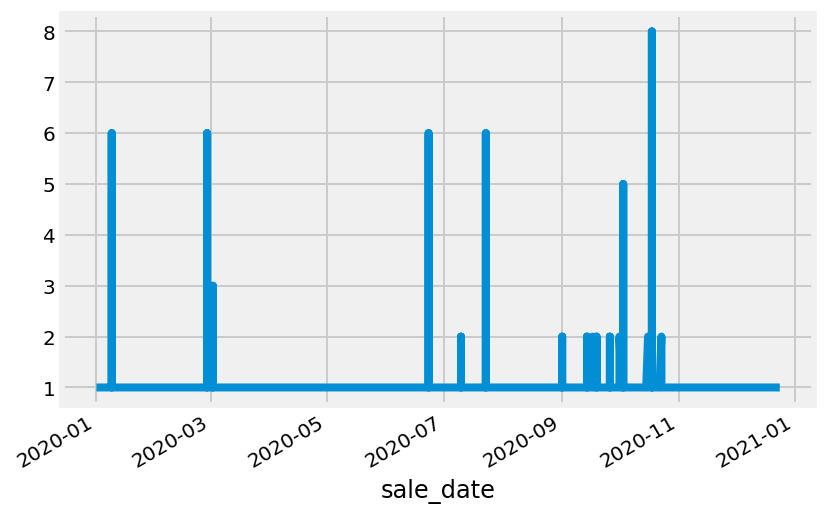

In [30]:
df2 = df.loc[(df.brand2 == 'bc')][['sale_date', 'qty']].copy()
df2 = df2.loc[(df2.sale_date >= '2020-01-01') & (df2.sale_date <= '2020-12-24')]
df2.set_index('sale_date').qty.plot()

In [32]:
bc.loc[bc['descr']=='bc ume cream 400g']

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales
1513,2020-01-09,14:16:27,Kelly,6.0,bc ume cream 400g,21.61,36.59,21.95,19.76,217.36,219.55
3077,2020-01-18,13:22:43,Lauren,1.0,bc ume cream 400g,21.61,34.58,0.00,3.46,38.04,45.34
10045,2020-02-28,13:29:31,Sandra,6.0,bc ume cream 400g,21.61,36.59,0.00,21.95,241.50,219.55
12854,2020-03-12,13:48:14,Paul,1.0,bc ume cream 400g,21.61,33.59,0.00,3.36,36.95,201.55
12855,2020-03-12,13:48:14,Paul,1.0,bc ume cream 400g,21.61,33.59,0.00,3.36,36.95,201.55
12856,2020-03-12,13:48:14,Paul,1.0,bc ume cream 400g,21.61,33.59,0.00,3.36,36.95,201.55
12857,2020-03-12,13:48:14,Paul,1.0,bc ume cream 400g,21.61,33.59,0.00,3.36,36.95,201.55
12858,2020-03-12,13:48:14,Paul,1.0,bc ume cream 400g,21.61,33.59,0.00,3.36,36.95,201.55
12859,2020-03-12,13:48:14,Paul,1.0,bc ume cream 400g,21.61,33.59,0.00,3.36,36.95,201.55
24408,2020-05-07,09:56:41,Paul,1.0,bc ume cream 400g,21.61,36.59,0.00,3.66,40.25,52.95


In [33]:
ume_cream = []

for q in df['descr']:
    if q=="bc ume cream 400g":
        ume_cream.append('1')
    else:
        ume_cream.append('0')


In [34]:
df['ume_cream'] = pd.DataFrame(ume_cream, columns = ['ume_cream'])
df['ume_cream'].value_counts()

0    65521
1       13
Name: ume_cream, dtype: int64

In [35]:
df.head()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales,brand2,ume_cream
0,2020-01-01,09:35:38,Monina,1.0,gvc pb peru balsam,3.45,19.95,1.00,0.00,18.95,250.41,gvc,0
1,2020-01-01,09:35:38,Monina,1.0,nv zinc comp 60t,5.09,10.32,0.52,0.98,10.78,250.41,nv,0
2,2020-01-01,09:35:38,Monina,1.0,tres b plus 150t,49.17,80.59,4.03,7.66,84.22,250.41,tres,0
3,2020-01-01,09:35:38,Monina,1.0,md goats yog (b) 500,4.50,7.10,0.36,0.00,6.74,250.41,md,0
4,2020-01-01,09:35:39,Monina,1.0,aroma bloom wood pea,52.25,90.64,4.53,8.61,94.72,250.41,aroma,0


In [36]:
df.ume_cream.value_counts()

0    65521
1       13
Name: ume_cream, dtype: int64

In [37]:
df.dtypes

sale_date     datetime64[ns]
sale_time             object
clerkname             object
qty                  float64
descr                 object
last_price           float64
cost                 float64
pdiscount            float64
gst                  float64
sellprice            float64
grosssales           float64
brand2                object
ume_cream             object
dtype: object

In [38]:
df.ume_cream = df.ume_cream.astype(float)

In [39]:
df.dtypes

sale_date     datetime64[ns]
sale_time             object
clerkname             object
qty                  float64
descr                 object
last_price           float64
cost                 float64
pdiscount            float64
gst                  float64
sellprice            float64
grosssales           float64
brand2                object
ume_cream            float64
dtype: object

<AxesSubplot:xlabel='sale_date'>

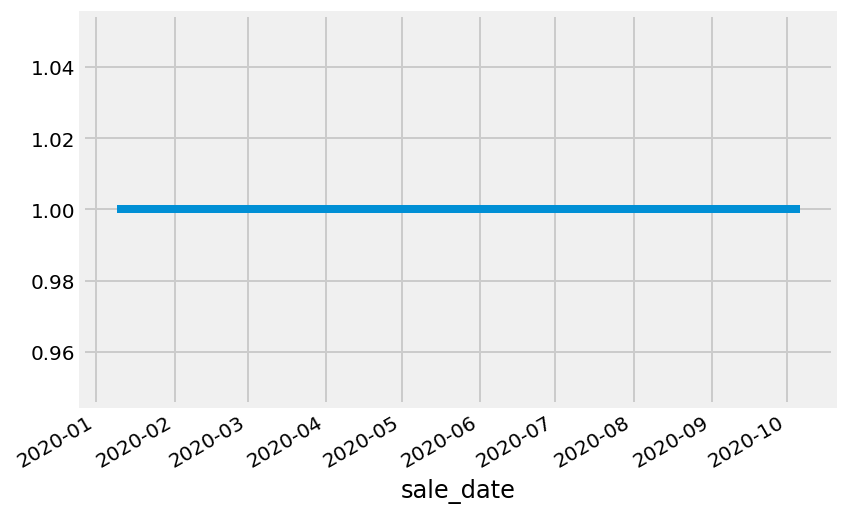

In [40]:
df2 = df.loc[(df.descr == 'bc ume cream 400g')][['sale_date', 'ume_cream']].copy()
df2 = df2.loc[(df2.sale_date >= '2020-01-01') & (df2.sale_date <= '2020-12-24')]
df2.set_index('sale_date').ume_cream.plot()

In [41]:
df['pdiscount'].sum()

3339.3500000000004

In [42]:
df.head()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales,brand2,ume_cream
0,2020-01-01,09:35:38,Monina,1.0,gvc pb peru balsam,3.45,19.95,1.00,0.00,18.95,250.41,gvc,0.0
1,2020-01-01,09:35:38,Monina,1.0,nv zinc comp 60t,5.09,10.32,0.52,0.98,10.78,250.41,nv,0.0
2,2020-01-01,09:35:38,Monina,1.0,tres b plus 150t,49.17,80.59,4.03,7.66,84.22,250.41,tres,0.0
3,2020-01-01,09:35:38,Monina,1.0,md goats yog (b) 500,4.50,7.10,0.36,0.00,6.74,250.41,md,0.0
4,2020-01-01,09:35:39,Monina,1.0,aroma bloom wood pea,52.25,90.64,4.53,8.61,94.72,250.41,aroma,0.0


In [43]:
df['profit'] = df['sellprice']-df['gst']-df['pdiscount']-df['last_price']
df['profit'].sum()

502586.80000000005

In [44]:
df['overhead'] = df['cost']-df['last_price']
df['overhead'].sum()

485013.62999999995

In [45]:
df.head()

,sale_date,sale_time,clerkname,qty,descr,last_price,cost,pdiscount,gst,sellprice,grosssales,brand2,ume_cream,profit,overhead
0,2020-01-01,09:35:38,Monina,1.0,gvc pb peru balsam,3.45,19.95,1.00,0.00,18.95,250.41,gvc,0.0,14.50,16.50
1,2020-01-01,09:35:38,Monina,1.0,nv zinc comp 60t,5.09,10.32,0.52,0.98,10.78,250.41,nv,0.0,4.19,5.23
2,2020-01-01,09:35:38,Monina,1.0,tres b plus 150t,49.17,80.59,4.03,7.66,84.22,250.41,tres,0.0,23.36,31.42
3,2020-01-01,09:35:38,Monina,1.0,md goats yog (b) 500,4.50,7.10,0.36,0.00,6.74,250.41,md,0.0,1.88,2.60
4,2020-01-01,09:35:39,Monina,1.0,aroma bloom wood pea,52.25,90.64,4.53,8.61,94.72,250.41,aroma,0.0,29.33,38.39


In [46]:
df.overhead.value_counts().sort_values()

9.75        1
45.87       1
32.40       1
2.25        1
32.74       1
         ... 
0.41      388
2.26      434
2.98      523
7.10      585
2.00     2225
Name: overhead, Length: 4237, dtype: int64

In [52]:
df['profit'].sum() - df['overhead'].sum()

17573.1700000001

In [53]:
bioc = []

for b in df['brand2']:
    if b=='bc':
        bioc.append('1')
    else:
        bioc.append('0')

In [54]:
df['bioc'] = pd.DataFrame(bioc, columns=['bioc'])

In [55]:
df.bioc = df.bioc.astype(float)

In [56]:
df.bioc.value_counts()

0.0    62871
1.0     2663
Name: bioc, dtype: int64

<AxesSubplot:xlabel='sale_date'>

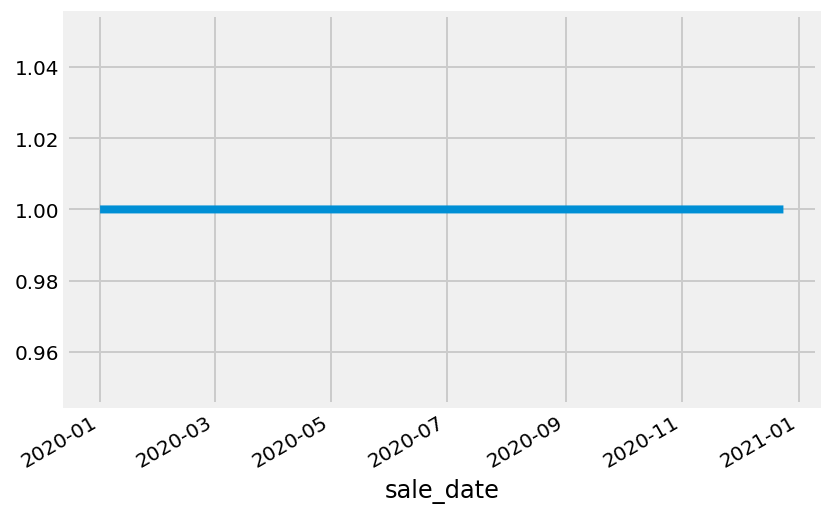

In [57]:
df3 = df.loc[(df.brand2 == 'bc')][['sale_date', 'bioc']].copy()
df3 = df3.loc[(df3.sale_date >= '2020-01-01') & (df3.sale_date <= '2020-12-24')]
df3.set_index('sale_date').bioc.plot()

In [58]:
df.columns

Index(['sale_date', 'sale_time', 'clerkname', 'qty', 'descr', 'last_price',
       'cost', 'pdiscount', 'gst', 'sellprice', 'grosssales', 'brand2',
       'ume_cream', 'profit', 'overhead', 'bioc'],
      dtype='object')

In [59]:
ts = df.drop(labels=['sale_time', 'clerkname', 'qty', 'descr', 'last_price',
       'cost', 'pdiscount', 'gst', 'sellprice', 'grosssales', 'brand2',
       'ume_cream', 'overhead', 'bioc'], axis=1)

In [60]:
x = ts['sale_date']
y = ts['profit']
    plt.figure(figsize=(16,5), dpi=100)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title="profit", xlabel='sale_date', ylabel='profit')
    plt.show()

IndentationError: unexpected indent (1490016132.py, line 3)

In [ ]:
df4 = df.loc[(df.brand2 == 'bc')][['sale_date', 'bioc']].copy()
df3 = df3.loc[(df3.sale_date >= '2020-01-01') & (df3.sale_date <= '2020-12-24')]
df3.set_index('sale_date').bioc.plot()